### Inteligencia Artificial

* Docente: Ing. Ruben Darios Florez Zela
* Alumno: Davis Bremdow Salazar Roa

# Detección de los ojos

El dataset relacionado al tema busca clasificar en función a los datos AF3, F7, F3, ... AF4 el estado del ojo y si este se encuentra abierto o no mediante y la cual se establece en la columna eyeDetection.

Por lo tanto para realizar el análisis mediante un modelo de clasificación de Machine Learning en primera instancia se invocan las librerías a usar para este propósito y entre las cuales se puede destacar algunas asociadas al procesamiento de archivos csv, arreglos, graficos y finalmente algoritmo de machine learning como sklearn. 

### Importando las librerías

In [49]:
# Importando las librerias
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, log_loss
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### 1. Recopilación de datos
### 2. Análisis explorativo (básico)

En sitios web como Kaggle se pueden optar por diferentes conjuntos de datos que resumen una problematica y con la cual se puede experimentar, sin embargo para decidir el modelo de ML a usar es necesario realizar un análisis de los datos recopilados, esto nos brindará un panorama general sobre su estructuras, características entre otros y con el cual escoger un modelo de regresión o clasificación será viable.

La librería pandas permite la lectura del archivo .csv para este análisis

In [50]:
df = pd.read_csv('EEG_Eye_State_Classification.csv')
df

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


#### prosiguiendo con el análisis
Con la función .info() la librería nos brinda un panorama genera sobre la cantidad de datos y el tipo de cada uno de estos, siendo para este caso que cada columna del dataset es del tipo númerico en especifico del tipo flotante a 64 bits a excepción de la última columna que es un entero y el cual se corresponde con el valor discreto de la clasificación

In [51]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   F7            14980 non-null  float64
 2   F3            14980 non-null  float64
 3   FC5           14980 non-null  float64
 4   T7            14980 non-null  float64
 5   P7            14980 non-null  float64
 6   O1            14980 non-null  float64
 7   O2            14980 non-null  float64
 8   P8            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  FC6           14980 non-null  float64
 11  F4            14980 non-null  float64
 12  F8            14980 non-null  float64
 13  AF4           14980 non-null  float64
 14  eyeDetection  14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


#### Exploración de datos ..
A continuación la función .describe() genera un reporte estadistico de todos los datos númericos del dataset el cual nos brinda una panorama general de que tan dispersos se encuentran los datos, el min, max así como los perceptiles que son un indicador porcentual sobre la cantidad de datos usados.

De este análisis se puede decir que tan dispersos se encuentran los datos de algunas columnas como por ejemplo AF3 que cuenta con una alta dispersión lo cual nos indica que los datos no van a seguir una línea de tendencia entre otros.

In [52]:
df.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


### Análisis exploratorio
Otra función que nos ayuda a analizar el dataset es .isnull().sum() la cual muestra un resumen de todos los valores nulos, con los cuales no se podría realizar un análisis y/o el entrenamiento de un modelo, por lo cual identificarlos es de vital importancia para realizar el tratamiento adecuado.

Para este caso no se cuenta con valores nulos, por lo que se puede seguir con en analísis

In [ ]:
df.isnull().sum()

AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64

### Matriz de correlación

La matriz de correlación es un método gráfico para analizar la linealidad entre 2 variables, para este caso se enfrentan todas las columnas entre si para la obtención de sus relaciones.

Y de las cuales se puede decir que existe una correlación positiva (1), negativa (-1) o no existe correlacción (0), siendo así que, por ejemplo para las columnas: 
* AF3 - F8: se puede decir que existe una correlación negativa o relación directa (cuando una variable incrementa la otra también)
Por otro lado:
* F3 - P7: Tienen una mediana correlación negativa (-0.6) que indica una relación inversa que define que cuendo una variable se incrementa la otra disminuye.

Finalmente la matriz de correlación se puede decir que la variable de salida eyeDetection tiene una baja correlación con el resto de columnas del dataset con valores que varian entre [-0.0075, 0.064]

Text(0.5, 1.0, 'Matriz de correlación')

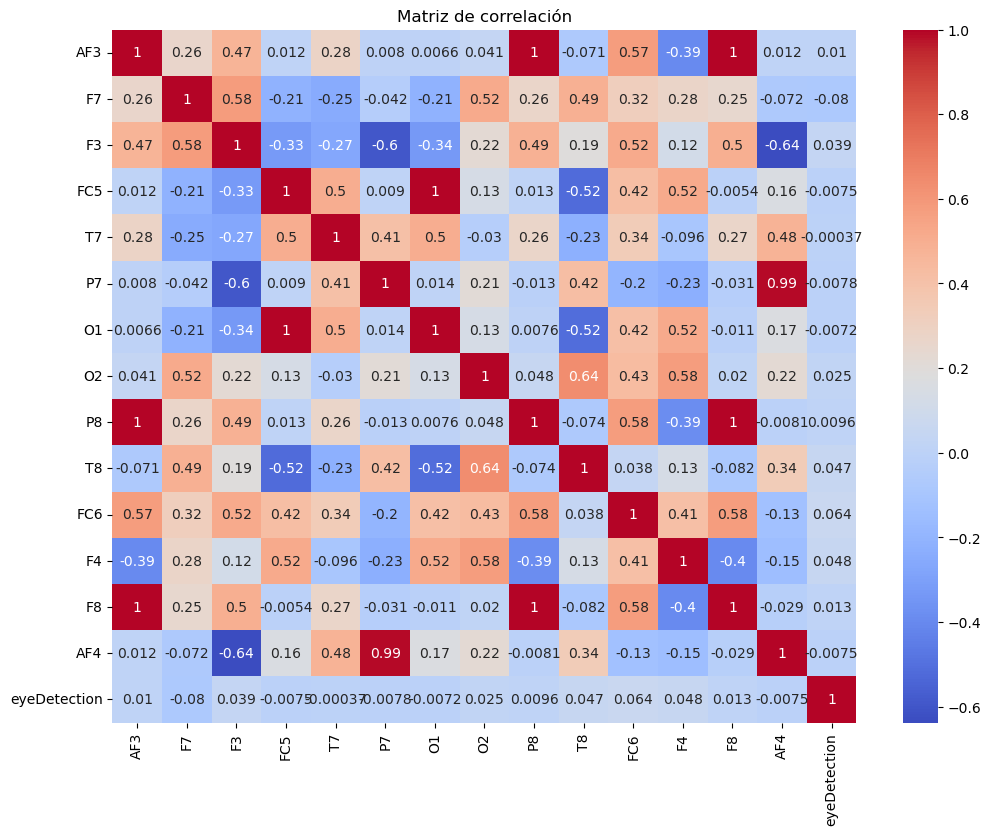

In [62]:
# Matriz de correlación
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")

# Correlación positiva: Directamente proporcionales
# Correlación negativa: Inversamente proporcional (no necesariamente)

### Asignación de variables

In [63]:
X = df.drop(columns=["eyeDetection"])
y = df["eyeDetection"]

### Escalamiento de los valores de entrada

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"Valor min después de la estandarización: {X_scaled.min()}")
print(f"Valor min después de la estandarización: {X_scaled.max()}")

Valor min después de la estandarización: -72.56969237508793
Valor min después de la estandarización: 122.38704780817893


## Dividiendo el dataset

In [57]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### Definiendo los modelos de entrenamiento para clasificación

In [58]:
# Definir modelos
models = {
    "Logistic Regression" : LogisticRegression(max_iter=2000),
    "KNeighbors" : KNeighborsClassifier(),
    "DecisitionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "GradientBoosting" : GradientBoostingClassifier(),
    "AdaBoost" : AdaBoostClassifier()
}


#### Entrenamiento

Logistic Regression - Accuracy: 0.5718, Log loss: 0.6702
KNeighbors - Accuracy: 0.8321, Log loss: 0.9563
DecisitionTree - Accuracy: 0.8371, Log loss: 5.8709
RandomForest - Accuracy: 0.9252, Log loss: 0.2678
SVM - Accuracy: 0.6132, Log loss: 0.6277
GradientBoosting - Accuracy: 0.8064, Log loss: 0.4474
AdaBoost - Accuracy: 0.6796, Log loss: 0.6358


<Figure size 800x600 with 0 Axes>

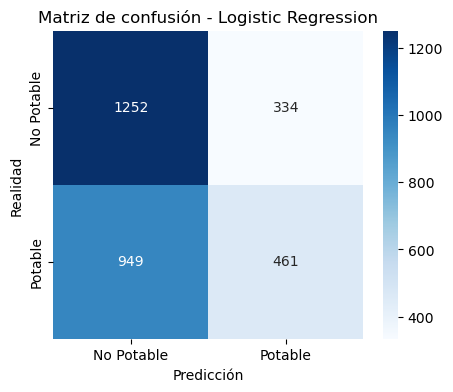

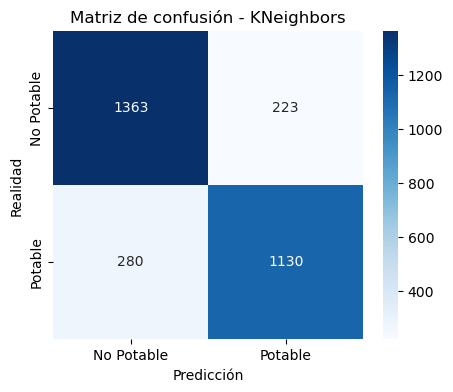

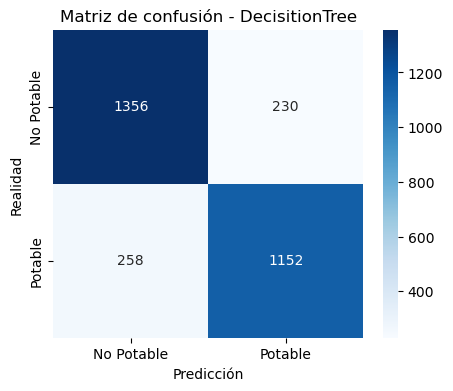

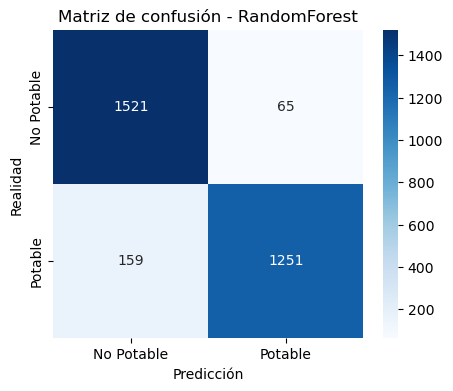

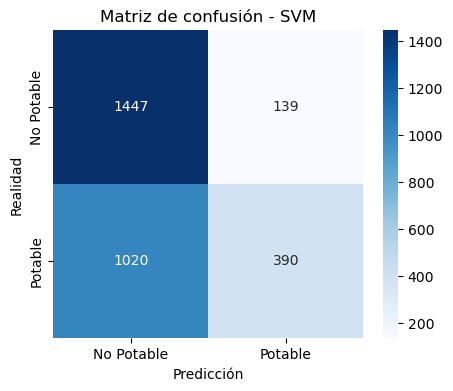

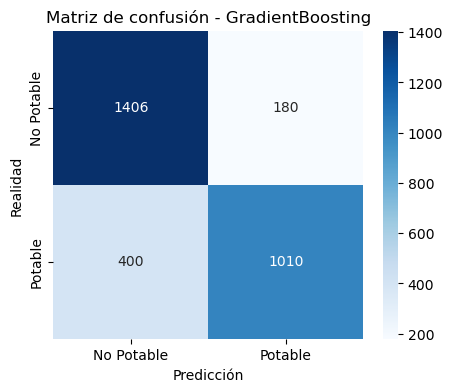

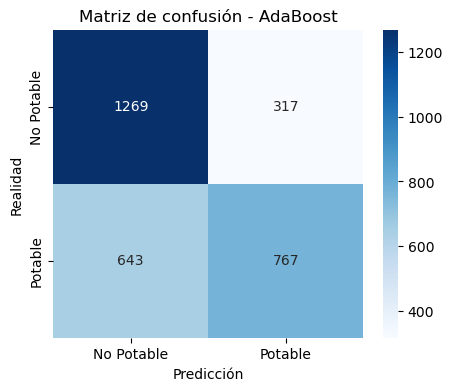

In [59]:
# Entrenar y evaluar modelos
plt.figure(figsize=(8, 6))
roc_curves = {}
accuracies = {}
log_losses = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calcular y almacenar el accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

    # Calcular y almacenar log loss
    loss = log_loss(y_test, y_prob)
    log_losses[name] = loss

    print(f"{name} - Accuracy: {accuracy:.4f}, Log loss: {loss:.4f}")

    # Matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Potable", "Potable"], yticklabels=["No Potable", "Potable"])
    plt.xlabel("Predicción")
    plt.ylabel("Realidad")
    plt.title(f"Matriz de confusión - {name}")

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_curves[name] = (fpr, tpr, roc_auc)


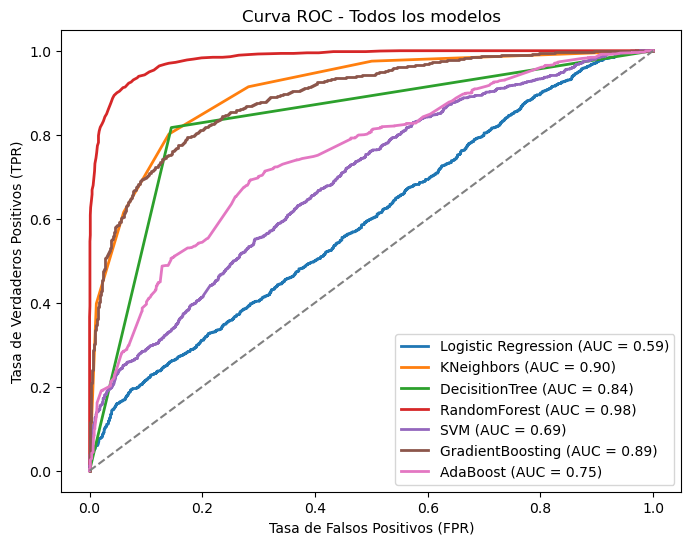

In [60]:
# Graficar todas ROCS en una sola gráfica
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, roc_auc) in roc_curves.items() :
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle="--")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC - Todos los modelos")
plt.legend(loc="lower right")

In [61]:
# Imprimir accuracies y log loss
print("Resultados de cada modelo: ")
for name in models.keys():
    print(f"{name} - Accuracy: {accuracies[name]:.4f}, Log Loss : {log_losses[name]:.4f}")


Resultados de cada modelo: 
Logistic Regression - Accuracy: 0.5718, Log Loss : 0.6702
KNeighbors - Accuracy: 0.8321, Log Loss : 0.9563
DecisitionTree - Accuracy: 0.8371, Log Loss : 5.8709
RandomForest - Accuracy: 0.9252, Log Loss : 0.2678
SVM - Accuracy: 0.6132, Log Loss : 0.6277
GradientBoosting - Accuracy: 0.8064, Log Loss : 0.4474
AdaBoost - Accuracy: 0.6796, Log Loss : 0.6358


### Resultados

Del conjunto de modelos entrenados el que presenta un mejor accuracy o exactitud es el módelo - RandomForest con un accuracy de **92.52%** y un error de **26.78%** en comparación a sus equivalentes en clasificación que cuenta con un alto accuracy, sin embargo con errores que superar el 50% o incluso 500% (DecisitionTree).

Este elección además se ve reflejada en la curva ROC que presente una gran area bajo la curva y con una precisión del 0.98 o 98% para la clasificación de sobre el estado del ojo:
* 0: ojo cerrado
* 1: ojo abierto